#### Import necessary packages

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'textblob'

#### Load the dataset

In [56]:
Df = pd.read_csv("mcdonalds.csv", encoding="ISO-8859-1")
# remove unnecessary columns
df = Df[["city", "review"]]
df.head()

,city,review
0,Atlanta,"I'm not a huge mcds lover, but I've been to be..."
1,Atlanta,Terrible customer service. Î¾I came in at 9:30...
2,Atlanta,"First they ""lost"" my order, actually they gave..."
3,Atlanta,I see I'm not the only one giving 1 star. Only...
4,Atlanta,"Well, it's McDonald's, so you know what the fo..."


#### The structure of the dataset

In [57]:
df.info

<bound method DataFrame.info of              city                                             review
0         Atlanta  I'm not a huge mcds lover, but I've been to be...
1         Atlanta  Terrible customer service. Î¾I came in at 9:30...
2         Atlanta  First they "lost" my order, actually they gave...
3         Atlanta  I see I'm not the only one giving 1 star. Only...
4         Atlanta  Well, it's McDonald's, so you know what the fo...
...           ...                                                ...
1520     Portland  I enjoyed the part where I repeatedly asked if...
1521      Houston  Worst McDonalds I've been in in a long time! D...
1522     New York  When I am really craving for McDonald's, this ...
1523      Chicago  Two points right out of the gate: 1. Thuggery ...
1524  Los Angeles  I wanted to grab breakfast one morning before ...

[1525 rows x 2 columns]>

#### Dimension of the dataset

In [58]:
df.shape

(1525, 2)

#### Data visualization

In [59]:
# define a function to perform sentiment analysis
def get_sentiment(review):
    blob = TextBlob(review)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df.loc[:, 'sentiment'] = df['review'].apply(get_sentiment)

print(df.head(10))


      city                                             review sentiment
0  Atlanta  I'm not a huge mcds lover, but I've been to be...  negative
1  Atlanta  Terrible customer service. Î¾I came in at 9:30...  negative
2  Atlanta  First they "lost" my order, actually they gave...  positive
3  Atlanta  I see I'm not the only one giving 1 star. Only...   neutral
4  Atlanta  Well, it's McDonald's, so you know what the fo...  negative
5  Atlanta  This has to be one of the worst and slowest Mc...  negative
6  Atlanta  I'm not crazy about this McDonald's. Î¾This is...  positive
7  Atlanta  One Star and I'm beng kind. I blame management...  positive
8  Atlanta  Never been upset about any fast food drive thr...  negative
9  Atlanta  This McDonald's has gotten much better. Usuall...  positive


#### Bar chart of sentiment distribution

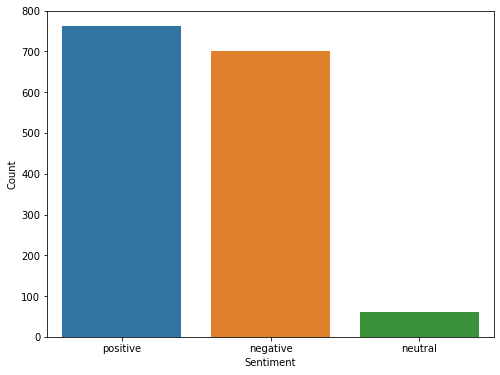

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x=df["sentiment"].value_counts().index, y=df["sentiment"].value_counts().values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.savefig("sentiment_distribution.png")
plt.show()

#### Stacked bar chart

<Figure size 720x720 with 0 Axes>

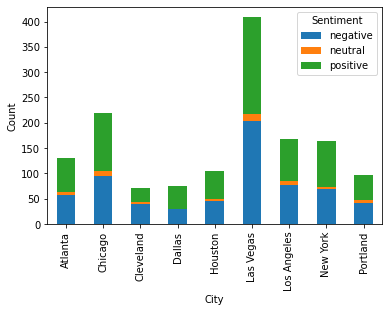

In [61]:
city_sentiment_counts = df.groupby(["city", "sentiment"]).size().unstack()
plt.figure(figsize=(10,10))
city_sentiment_counts.plot(kind="bar", stacked=True)
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(title="Sentiment", loc="upper right")
plt.savefig("Stacked.png")
plt.show();

#### Word cloud for negative, positive, and neutral sentiments

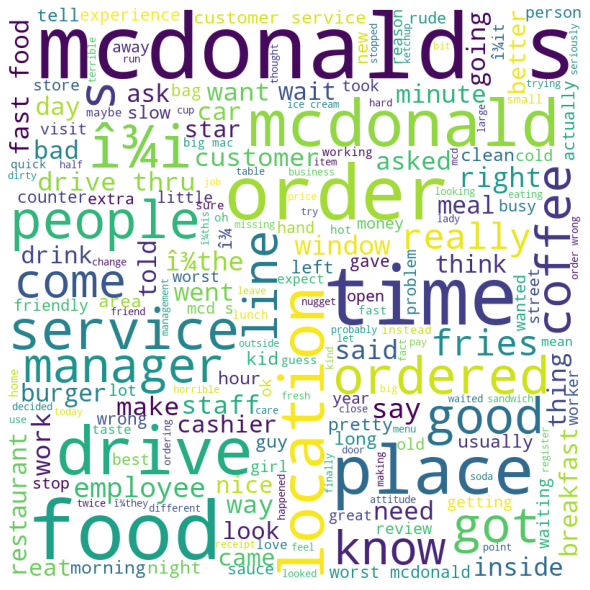

In [84]:
stopwords = set(STOPWORDS)
stopwords_file = open("stopwords_en.txt", "r")
stopwords_list = [line.rstrip('\n') for line in stopwords_file]
stopwords.update(stopwords_list)


df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))

def get_sentiment_score(sentiment):
    if sentiment == 'positive':
        return 1
    elif sentiment == 'negative':
        return -1
    else:
        return 0

df['sentiment_score'] = df['sentiment'].apply(get_sentiment_score)

text = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(text)

print("")
print('')
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("wordcloud.png")
plt.show()

#### Sentiment Score

In [85]:
sentiment_score = df['sentiment_score'].sum()
print('Sentiment Score:', sentiment_score)
print("")

Sentiment Score: 60



#### Word cloud for negative sentiments`

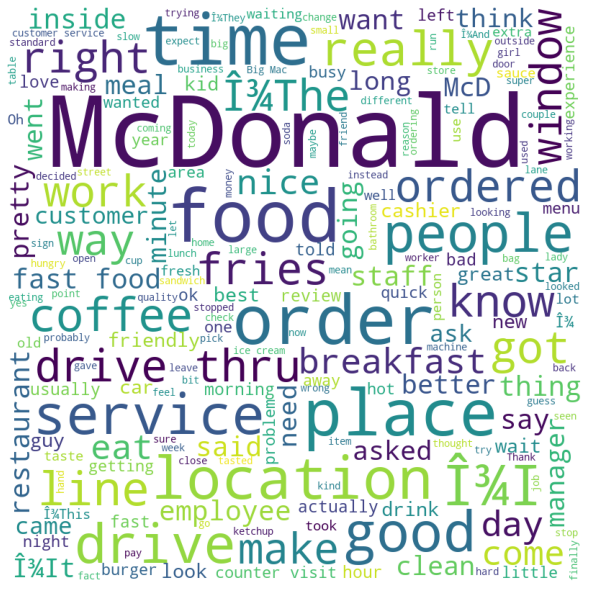

In [66]:
# select the positive reviews
negative_reviews = df[df['sentiment'] == 'negative']
# join the reviews into a single string
text = ' '.join(positive_reviews['review'])
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(text)
print("")
print('')
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig("wordnegative.png")
plt.show()

## Data Analysis

#### Frequency-inverse document frequency

In [96]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stop_words]
    words = [ps.stem(w) for w in words]
    return ' '.join(words)

df['processed_review'] = df['review'].apply(preprocess_text)

tfidf = TfidfVectorizer()
tfidf_scores = tfidf.fit_transform(df['processed_review'])
feature_names = tfidf.get_feature_names()
df_tfidf = pd.DataFrame(tfidf_scores.toarray(), columns=feature_names)

top_words = df_tfidf.sum().sort_values(ascending=False).head(20)
print(top_words)

mcdonald    72.764727
order       68.956075
food        55.452807
drive       51.050202
time        48.005738
servic      45.550878
place       40.461686
locat       36.962073
wait        33.097516
fri         29.859012
good        29.260674
î¾i         28.828419
ask         27.635806
peopl       27.242520
custom      26.216977
manag       26.216532
coffe       25.592168
minut       25.456518
work        25.445766
worst       25.349155
dtype: float64


#### Modelling: Logistic Regression, Random Forest, Support Vector Machine,  and Decision Tree Models

In [111]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in stopwords]))
df['sentiment_score'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment_score'], test_size=0.2, random_state=42)

# Convert the text data into a numerical representation
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


clf = LogisticRegression()

clf.fit(X_train_vec, y_train)


y_pred = clf.predict(X_test_vec)
clf_accuracy = round(accuracy_score(y_test, y_pred),4)


from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(X_train_vec, y_train)


y_pred = rfc.predict(X_test_vec)
rfc_accuracy = round(accuracy_score(y_test, y_pred), 4)


from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier()
dtc.fit(X_train_vec, y_train)

y_pred = dtc.predict(X_test_vec)
dtc_accuracy = round(accuracy_score(y_test, y_pred), 4)


from sklearn.svm import SVC


svm = SVC()
svm.fit(X_train_vec, y_train)


y_pred = svm.predict(X_test_vec)
svm_accuracy = round(accuracy_score(y_test, y_pred), 4)



models = [ 'Random Forest', 'Logistic Regression', 'SVM','Decision Tree']
accuracies = [rfc_accuracy, clf_accuracy, svm_accuracy,dtc_accuracy]

df_models = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(df_models)

                 Model  Accuracy
0        Random Forest    0.7410
1  Logistic Regression    0.6984
2                  SVM    0.6918
3        Decision Tree    0.6459
